# Explore here

Imports 

In [474]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Perform a basic EDA. In this exercise the target variable will be "diabetes_number", indicates the population of diabetes of a given county in the EEUU.

First load the data and transfer to raw folder

In [475]:
all_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
all_data.to_csv("../data/raw/all_data.csv")

all_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


Get the info of the dataset to know what type of variables will be working as the data_dict csv provided only gives and explanation and not their dtype

In [476]:
all_data.info(verbose= True, show_counts= True) #Need to use verbose parameter to show every column and identify them better

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 108 columns):
 #    Column                                                                         Non-Null Count  Dtype  
---   ------                                                                         --------------  -----  
 0    fips                                                                           3140 non-null   int64  
 1    TOT_POP                                                                        3140 non-null   int64  
 2    0-9                                                                            3140 non-null   int64  
 3    0-9 y/o % of total pop                                                         3140 non-null   float64
 4    19-Oct                                                                         3140 non-null   int64  
 5    10-19 y/o % of total pop                                                       3140 non-null   float64
 6    20-29         

We have only two object variables which are "COUNTY_NAME" and "STATE_NAME". Our target variable "diabetes_number" is numeric. There are no null variables.

Now check for any duplicate entries.

In [477]:
all_data.duplicated().sum()

np.int64(0)

As the only two object columns are not really necessary to predict our target value (diabetes_number), we will delete them to only leave the numeric ones 

In [478]:
all_data = all_data.drop(["COUNTY_NAME"], axis= 1)
all_data = all_data.drop(["STATE_NAME"], axis= 1)

With no duplicates and no null values we now standarize the data using StandardScaler

In [479]:
#Save all the variables for the new dataframe
columns = []

for x in all_data.columns:     
     #if x != "diabetes_number": (This was trying to check the various results if I include or not the target variable to be standarized)
     columns.append(x)

#Scale all the variables using StandarScaler
#Create the scaler first
scaler = StandardScaler()

#Use the StandardScaler and create a new dataframe
scal_features = scaler.fit_transform(all_data[columns])
fact_data_scal = pd.DataFrame(scal_features, index = all_data.index, columns = columns)

#fact_data_scal["diabetes_number"] = all_data["diabetes_number"] (This was trying to check the various results if I include or not the target variable to be standarized)

fact_data_scal.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,-1.940874,-0.145679,-0.142421,0.158006,-0.135556,0.573496,-0.153144,0.027610,-0.139384,0.588469,...,-0.138900,-0.063696,-0.071720,-0.089834,-0.129902,-0.609615,-0.582796,-0.669652,-0.147523,-1.082865
1,-1.940742,0.341296,0.287476,-0.242861,0.320383,-0.193107,0.183774,-0.469965,0.230620,-0.110300,...,0.563986,-0.394103,-0.414900,-0.337677,0.376251,-0.433549,-0.393279,-0.343373,0.389791,-0.420704
2,-1.940610,-0.237785,-0.239429,-0.419441,-0.246181,-0.439718,-0.225971,0.272104,-0.218759,0.656538,...,-0.219763,2.432709,2.483064,2.317776,-0.183415,1.855312,1.880929,1.777443,-0.204321,0.903618
3,-1.940478,-0.245223,-0.246032,-0.426966,-0.254791,-0.609076,-0.230792,0.396168,-0.220555,1.264959,...,-0.256918,0.376846,0.423984,0.299632,-0.229096,-0.257483,-0.203761,-0.180233,-0.242100,-1.745026
4,-1.940346,-0.138966,-0.135053,0.186249,-0.137140,0.216679,-0.155888,-0.200808,-0.143570,0.088582,...,-0.074198,0.156575,0.195197,0.158008,-0.111247,-0.081417,-0.014244,-0.017093,-0.124105,-1.745026


Now that the data is standarized, we divide the set into train and test

In [480]:
X = fact_data_scal.drop(["diabetes_number"], axis= 1) #Independant variables
y = fact_data_scal["diabetes_number"]#Dependant variable, our target

#Using train_test_split from Sklearn, divide the variables into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)#Random state set to 42 to replicate the shuffle everytime

After dividing into train and test, we perform a feature selection. This time, as well as in the previous exercise we don't know the ammount of features to select (k) as SelectKBest with f_regression is going to be used.

Because of this I will use the last method used in the last exercise (which given the big ammount of features to be selected might not be the best)

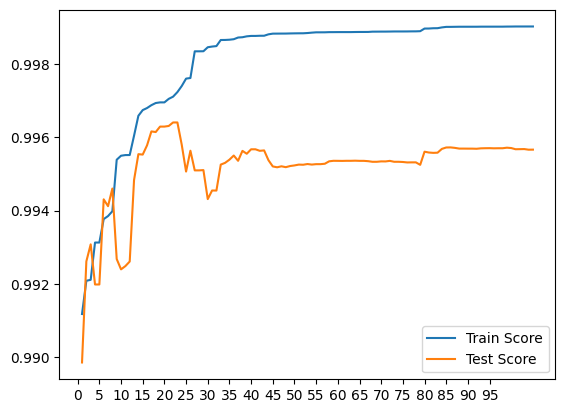

In [481]:
#List of possible values of K and performance
k_val = range(1, len(all_data.columns))
train_scores = []
test_scores = []

for k in k_val:
    #Using selectkbest with every k value and f_regression since it's a linear regression
    selection_model = SelectKBest(f_regression, k= k)
    X_train_sel = selection_model.fit_transform(X_train, y_train)

    #Train the linear regression model
    model = LinearRegression() #Create the model
    model.fit(X_train_sel, y_train)

    #Save the train score and test score on each iteration
    train_scores.append(model.score(X_train_sel, y_train))

    X_test_sel = selection_model.transform(X_test)
    test_scores.append(model.score(X_test_sel, y_test))

#Now we visualize the results to choose the best K
plt.plot(k_val, train_scores, label='Train Score')
plt.plot(k_val, test_scores, label='Test Score')
plt.xticks(np.arange(0, 100, step=5))
plt.legend()
plt.show()

In conclussion, the performance of the model is relatively high around a k= 30. So we continue with that k value to select the features.

In [482]:
#We create the selection model, in this case k is the number of features to be selected and f_regression the method used to determine wich are the best features to include
selection_model = SelectKBest(f_regression, k = 30)

#Fit the model with both X_train and y_train
selection_model.fit(X_train, y_train)

#Gets an array of the features selected
ix = selection_model.get_support()

#With ix we convert that array information into two new datasets that contain the features selected
X_train_features = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_features = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])


Save the processed data

In [483]:
#Add the target variable to the dataframes that contain the features selected previously
X_train_features["diabetes_number"] = list(y_train)
X_test_features["diabetes_number"] = list(y_test)

#Save the data
X_train_features.to_csv("../data/processed/clean_train.csv", index = False)
X_test_features.to_csv("../data/processed/clean_test.csv", index = False)

After saving the data, loading it again to procceed with the linear regression model fitting (before doing lasso)

In [484]:
#Read the data saved
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

#Divide into train and test for each independant and dependant variables
X_train = train_data.drop(["diabetes_number"], axis= 1) #Independant 
y_train = train_data["diabetes_number"] #Dependant

X_test = test_data.drop(["diabetes_number"], axis= 1) #Independant 
y_test = test_data["diabetes_number"] #Dependant


In [485]:
#Create the linear regression model
model = LinearRegression()

#Train the linear regression model
model.fit(X_train, y_train)

LinearRegression()

Now following the steps, we print the parameters fitted by the model.
- Intercept variable it's the value of the dependant variable (diabetes_number) when all the independant variables are zero.
- Coefficients are the ones that the model uses to get the value of Y, the target.

In [486]:
print(model.intercept_)
print(model.coef_)

0.0003160653271432126
[-4.56756528e-01  5.08595527e-01 -3.92345414e-01 -9.96701003e-01
 -1.13791237e+00 -3.59982226e-01 -5.61722687e-01 -1.33994684e-01
 -4.23885236e-01  8.23544319e-02 -2.41139243e-01 -4.56756528e-01
  2.28721516e-01  1.10294260e-01 -8.49400352e-02  1.22998622e-01
 -1.23600386e-01 -1.28596783e-01 -5.06449264e-03  2.30018432e-02
  1.68348160e-02 -7.92763186e-02 -5.27851498e-01 -5.37386174e-01
  6.05846633e+00  6.82576425e-01 -9.70397599e-02  3.01258729e-01
 -2.24167969e-01 -1.84785440e-01]


Predict using the model and review the results of MSE and R2 score

In [487]:
y_pred = model.predict(X_test)

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.0018628346391258354
0.9943147507578788


Since the model has a low MSE and a high R2 Score it means that it's working correctly and the predictions are good. I know that we need to optimize it with Lasso, and the solution does so, but it's because it's using a Logistic Regression algorithm wich causes the R2 score to be lower at 0.7 and MSE higher than 1000 and then it uses Lasso algorithm with alpha 1.0 which returns a R2 score of 0.99.

I found this confusing as it's an exercise for linear regression not logistic regression.

Testing Lasso anyway to see how the result vary according to alpha value

In [488]:
from sklearn.linear_model import Lasso

alpha = np.arange(0.1, 1, 0.1) #Not starting with 0 value of alpha as ut nay lead to unexpected results

for a in alpha:
    lasso_model = Lasso(alpha = a)

    # Training the model
    lasso_model.fit(X_train, y_train)

    # We evaluate the performance of the model on the test data
    score = lasso_model.score(X_test, y_test)
    print(f"Score using alpha {a} is {score*100}")


Score using alpha 0.1 is 98.10411854280422
Score using alpha 0.2 is 95.37848398684187
Score using alpha 0.30000000000000004 is 91.12255714297964
Score using alpha 0.4 is 85.5188760277792
Score using alpha 0.5 is 79.09915973834046
Score using alpha 0.6 is 71.4531976724611
Score using alpha 0.7000000000000001 is 62.00369725457367
Score using alpha 0.8 is 50.891852852527066
Score using alpha 0.9 is 38.32278955326023


As we can see above, since the linear regression model is already correct, using lasso and increasing alpha value only decreases it's performance as a higher value reduces the model coefficients.